In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io
import tifffile as tiff

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65535].


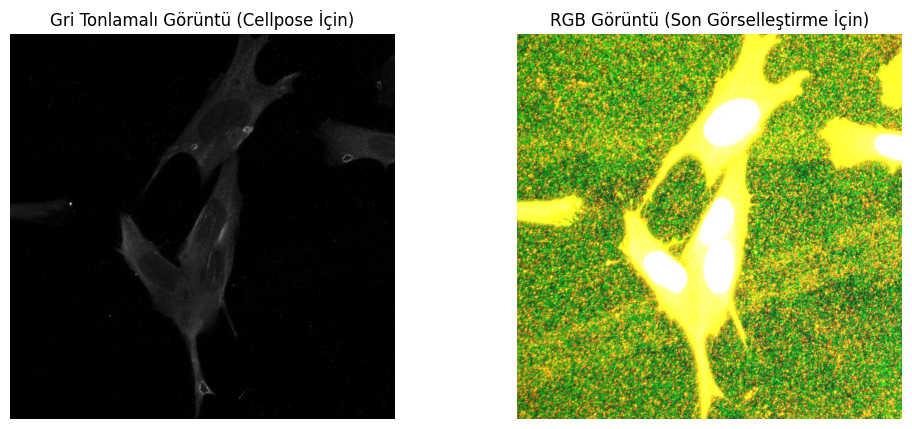

In [4]:
# Görüntüyü yükle
path = f'Microscopy Data Huntingtin aggregates/Raw data #1/20240131_CKR_E10B_mHtt-HAQ25Doxy96H_HA-star580_CCT1-star635P_A11-star460L_nucspotlive488_1_MAX_Composite.tif'
image_path = path # Görüntü dosyanın yolunu buraya ekle
image = tiff.imread(image_path)  # TIFF formatındaki görüntüyü aç

# Eğer 4 kanallıysa, ilk 3 kanal RGB, ilk kanal çekirdek analizi için kullanılacak
if len(image.shape) == 3 and image.shape[0] == 4:
    image_gray = image[0]  # İlk kanalı kullan (genelde çekirdek bilgisi olur)
    image_rgb = np.transpose(image[:3], (1, 2, 0))  # RGB sıralamasına getir
else:
    image_gray = image  # Zaten tek kanallıysa, direkt kullan
    image_rgb = np.stack([image] * 3, axis=-1)  # Siyah-beyazı sahte RGB'ye çevir

# Görüntüleri göster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Gri Tonlamalı Görüntü (Cellpose İçin)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_rgb)
plt.title("RGB Görüntü (Son Görselleştirme İçin)")
plt.axis("off")

plt.show()

100%|██████████| 25.3M/25.3M [00:21<00:00, 1.23MB/s]
100%|██████████| 3.54k/3.54k [00:00<00:00, 5.00MB/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65535].


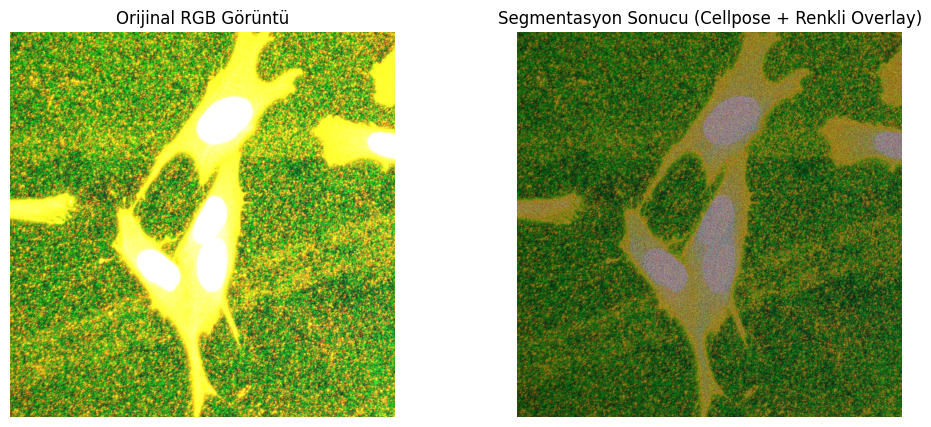

Tespit edilen çekirdek sayısı: 94


In [5]:
# Cellpose modelini yükle
model = models.Cellpose(model_type='nuclei')

# Segmentasyon işlemi (tek kanal kullanıyoruz)
masks, flows, styles, diams = model.eval(image_gray, diameter=None, channels=[0, 0])

# Segmentasyon maskesini oluştur
colored_mask = np.zeros_like(image_rgb)  # RGB görüntü boyutunda boş bir maske

# Maske içindeki her çekirdeği farklı renklendir
for i in range(1, np.max(masks) + 1):
    colored_mask[masks == i] = np.random.randint(0, 255, 3)  # Rastgele renk ata

# Maskeyi yarı şeffaf hale getir (orijinal RGB görüntü ile birleştir)
overlay = (0.6 * image_rgb + 0.4 * colored_mask).astype(np.uint8)

# Sonucu görselleştir
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Orijinal RGB Görüntü")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Segmentasyon Sonucu (Cellpose + Renkli Overlay)")
plt.axis("off")

plt.show()

# Tespit edilen toplam çekirdek sayısını yazdır
nuclei_count = np.max(masks)
print(f"Tespit edilen çekirdek sayısı: {nuclei_count}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65535].


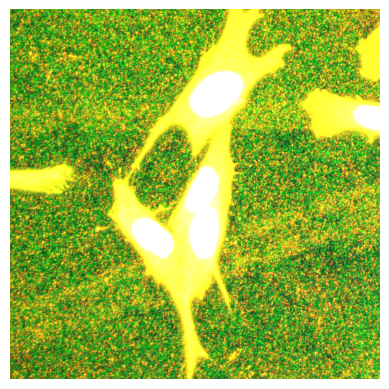

In [11]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

# .tif dosyanı yükle
image = tiff.imread(path)

# Eğer görüntü 4 kanallı ise (RGBA), yalnızca RGB'yi kullan
if image.shape[0] == 4:
    image_rgb = image[:3]  # İlk üç kanal (RGB)
else:
    image_rgb = image  # Eğer zaten RGB ise, olduğu gibi kullan

# Görüntüyü renkli olarak göster
plt.imshow(image_rgb.transpose(1, 2, 0))  # (kanal, yükseklik, genişlik) -> (yükseklik, genişlik, kanal)
plt.axis("off")
plt.show()